# Testing Images

1/1 [==============================] - 0s 342ms/step


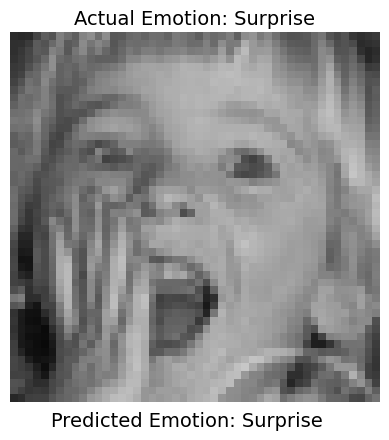

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained CNN model saved in .h5 format
model = load_model('custom_modelv47.h5')

# Load and preprocess the image
img_path = 'test/6/PrivateTest_14522193.jpg'  # Replace with the path of the test image
img = image.load_img(img_path, target_size=(48, 48))  # Resize the image to match the model's input size
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add a batch dimension
img /= 255.0  # Normalize pixel values to the range [0, 1]

# Make predictions using the trained model
predictions = model.predict(img)

# Define a list of facial expression labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Get the index of the predicted label with the highest probability
predicted_label_index = np.argmax(predictions)
predicted_label = emotion_labels[predicted_label_index]


actual_label = 'Surprise'

# Display both labels with modified font sizes
fig, ax = plt.subplots()
ax.imshow(img[0])
ax.axis('off')
ax.set_title("Actual Emotion: " + actual_label, fontsize=14)  # Fontsize for actual label
plt.figtext(0.5, 0.06, "Predicted Emotion: " + predicted_label, ha="center", fontsize=14)  # Fontsize for predicted label
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
import cv2
from keras.preprocessing.image import img_to_array
import os

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

classifier = load_model('custom_modelv47.h5')
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

def predict_emotion(image_path, window_size=(800, 600)):  # Set desired window size
    image = cv2.imread(image_path)
    labels = []
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray)

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

        # Convert grayscale image to RGB format
        roi_rgb = cv2.cvtColor(roi_gray, cv2.COLOR_GRAY2RGB)

        if np.sum([roi_rgb]) != 0:
            roi = roi_rgb.astype('float') / 255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0)

            prediction = classifier.predict(roi)[0]
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0))
            label = emotion_labels[prediction.argmax()]
            label_position = (x, y - 10)
            cv2.putText(image, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        else:
            cv2.putText(image, 'No Faces', (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Resize the image to the desired window size
    image = cv2.resize(image, window_size)
    cv2.imshow('Emotion Detector', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Specify the path to the directory containing the sample images testimages.jpeg
sample_images_dir = 'sample images'

# Loop through all images in the directory
for filename in os.listdir(sample_images_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(sample_images_dir, filename)
        predict_emotion(image_path)


1/1 [==============================] - 0s 49ms/step


# Testing Video

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from moviepy.editor import VideoFileClip
from IPython.display import display, Audio
import pygame


# Load the face detection model and the emotion classification model
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
classifier = load_model('custom_modelv47.h5')
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Change this to the path of video file
video_path = 'EmotionsVideo.mp4'

# Create a VideoFileClip to get the audio
video_clip = VideoFileClip(video_path)
audio_clip = video_clip.audio  # Extract the audio from the video

# Set the desired window size for the video display
window_size = (1200, 600)

cap = cv2.VideoCapture(video_path)

running = True  # Flag to control the loop

while running:
    # Create a VideoWriter to save the processed video with sound
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    output_video = cv2.VideoWriter('output_video_with_sound.avi', fourcc, 30, window_size)
    #Initialize pygame mixer
    pygame.mixer.init()

    # Play sound for specific emotions
    pygame.mixer.music.load("Upbeat and Happy Background Music.mp3")
    pygame.mixer.music.play()

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        labels = []
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
            roi_color = frame[y:y+h, x:x+w]
            roi_color = cv2.resize(roi_color, (48, 48), interpolation=cv2.INTER_AREA)

            if np.sum([roi_color]) != 0:
                roi = roi_color.astype('float') / 255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi, axis=0)

                prediction = classifier.predict(roi)[0]
                label = emotion_labels[prediction.argmax()]
                label_position = (x, y - 10)
                cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            else:
                cv2.putText(frame, 'No Faces', (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Resize the frame to the desired window size
        frame = cv2.resize(frame, window_size)

        # Write the frame to the output video
        output_video.write(frame)

        cv2.imshow('Emotion Detector', frame)
        key = cv2.waitKey(1)

        if key & 0xFF == ord('q'):
            pygame.mixer.music.stop()
            running = False  # Stop the loop
            break

    output_video.release()

cap.release()
cv2.destroyAllWindows()

# Display the audio in the Jupyter Notebook
display(audio_clip)


1/1 [==============================] - 0s 30ms/step


In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from moviepy.editor import VideoFileClip
from IPython.display import display, Audio

# Load the face detection model and the emotion classification model
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
classifier = load_model('custom_modelv47.h5')
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Change this to the path of video file
video_path = 'myvideov10.mp4'

# Create a VideoFileClip to get the audio
video_clip = VideoFileClip(video_path)
audio_clip = video_clip.audio  # Extract the audio from the video

# Set the desired window size for the video display
window_size = (1000, 600)

cap = cv2.VideoCapture(video_path)

running = True  # Flag to control the loop

while running:
    # Create a VideoWriter to save the processed video with sound
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    output_video = cv2.VideoWriter('output_video_with_sound.avi', fourcc, 30, window_size)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        labels = []
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
            roi_color = frame[y:y+h, x:x+w]
            roi_color = cv2.resize(roi_color, (48, 48), interpolation=cv2.INTER_AREA)

            if np.sum([roi_color]) != 0:
                roi = roi_color.astype('float') / 255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi, axis=0)

                prediction = classifier.predict(roi)[0]
                label = emotion_labels[prediction.argmax()]
                label_position = (x, y - 10)
                cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            else:
                cv2.putText(frame, 'No Faces', (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Resize the frame to the desired window size
        frame = cv2.resize(frame, window_size)

        # Write the frame to the output video
        output_video.write(frame)

        cv2.imshow('Emotion Detector', frame)
        key = cv2.waitKey(1)

        if key & 0xFF == ord('q'):
            running = False  # Stop the loop
            break

    output_video.release()

cap.release()
cv2.destroyAllWindows()

# Display the audio in the Jupyter Notebook
display(audio_clip)


1/1 [==============================] - 0s 125ms/step


# REAL TIME MONITORING

In [ ]:
#input image must 48x48x3
import numpy as np
import tensorflow as tf
from keras.models import load_model
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from time import sleep


faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

classifier =load_model('custom_modelv47.h5')
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy','Neutral', 'Sad', 'Surprise']

#emotion_labels = ['Angry', 'Digust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

cap = cv2.VideoCapture(0)


while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_color = frame[y:y+h, x:x+w]
        #roi_gray = cv2.resize(roi_color,(224,224),interpolation=cv2.INTER_AREA)

        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_color,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0))
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y-10)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

    cv2.imshow('Emotion Detector',frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 126ms/step
